# Day 8 | support vector machine

### import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import scale

/Users/apple/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
train_df = pd.read_csv('../Day_6_project/data/BloodDonation_Train.csv')

### clean data

In [69]:
def clean_data(data):
    new_data = data.copy()
    new_data.drop(['Unnamed: 0','Total Volume Donated (c.c.)'], axis = 1, inplace = True)
    X = scale(new_data.drop(['Made Donation in March 2007', 'Months since Last Donation'], axis = 1))
    X = pd.DataFrame(X, columns=['Months since First Donation', 'Number of Donations'])
    y = new_data['Made Donation in March 2007']
    return X, y

In [74]:
X, y = clean_data(train_df)
X.head()

,Months since First Donation,Number of Donations
0,7.772052,2.641824
1,1.320468,-0.249946
2,1.843569,0.039231
3,2.541038,0.452341
4,3.238506,1.774293


### split training and validation data

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("length of training data: {} , shape : {}".format(len(X_train), X_train.shape))
print("length of testing data: {} , shape : {}".format(len(X_test), X_test.shape))

length of training data: 403 , shape : (403, 2)
length of testing data: 173 , shape : (173, 2)


### fitting the SVM model

In [59]:
svm_linear = SVC(kernel = 'rbf')
svm_linear.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [60]:
#### predict
pred_linear = svm_linear.predict(X_test)

In [61]:
#### evaluation
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_linear))

             precision    recall  f1-score   support

          0       0.72      1.00      0.84       124
          1       0.00      0.00      0.00        49

avg / total       0.51      0.72      0.60       173



/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Visualizing training results

In [95]:
from matplotlib.colors import ListedColormap
def draw_plot(X, y):
    X_set, y_set = X.copy(), y.copy()
    X1, X2 = np.meshgrid(np.arange(start = X_set.iloc[:, 0].min() - 1, stop = X_set.iloc[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set.iloc[:, 1].min() - 1, stop = X_set.iloc[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, svm_linear.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(y_set.unique()):
        plt.scatter(X_set[y_set == j].iloc[:,0], X_set[y_set == j].iloc[:,1],
                    c = ListedColormap(('red', 'green'))(i), label = j)
    plt.title('SVM (Training set)')
    plt.xlabel('Months since First Donation')
    plt.ylabel('Number of Donations')
    plt.legend()
    plt.show()

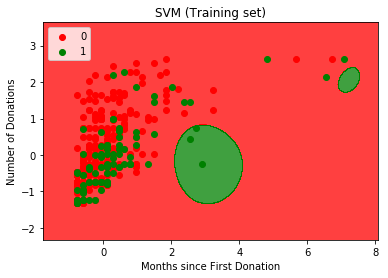

In [96]:
draw_plot(X_train, y_train)

In [65]:
### 用上一次的project的資料，測試只用兩個feature做分類結果非常差，本次目的只為了練習視覺化